In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from einops import rearrange
import random
from matplotlib.colors import rgb2hex
import os
import copy

In [67]:
# Explore directory
DATA_DIR = "house_data/houses"
HOUSES_DIRS = [os.path.join(DATA_DIR, o) for o in os.listdir(DATA_DIR) if os.path.isfile(os.path.join(DATA_DIR,o,"schematic.npy"))]
print("Num suable houses in dir:", len(HOUSES_DIRS))

Num suable houses in dir: 2535


In [68]:
def rearrange_sample(house):
    # this rearranges the training sample into an x y z m shape
    world = rearrange(house, 'z y x m -> x y z m')
    return world

In [69]:
def trim_world_empty(world):
    # this removes empty voxels sorrounding a world
    arr_slices = tuple(np.s_[curr_arr.min():curr_arr.max() + 1] for curr_arr in world[:,:,:,0].nonzero())
    return world[arr_slices]

In [70]:
def pad_world(world):
    # this pads a world to the smallest cubic volume that it can fit in
    (x, y, z, m) = world.shape
    min_dim = max(world.shape[0:3])
    world = np.pad(world, ((0, min_dim - x),(0, min_dim - y),(0, min_dim - z), (0, 0)), 'constant')
    return world
def something():
    return "hi"

In [143]:
def get_color_dict(unique_vals):
    state = np.random.RandomState(0)
    color_arr = list(state.uniform(0, 1, (len(unique_vals), 3)))
    color_arr = [rgb2hex(color) for color in color_arr]
    color_arr = [None] + color_arr # set all to 0 for air block (block id 0)
    colors = color_arr[: len(unique_vals)] # chop off the last random
    color_dict = {str(unique_vals[i]): colors[i] for i in range(len(unique_vals))} # make string
    return color_dict # return

print("sample colour dict:", get_color_dict(np.array([2,3,4])))

sample colour dict: {'2': None, '3': '#8cb69a', '4': '#8b6ca5'}


In [144]:
# an array for some sample examples
selected_sample_houses_dirs = ["workdir.2018-06-22-16:39:03.ip-172-31-9-250", # match box
    "workdir.2018-06-23-07:16:40.ip-172-31-5-36", # a house with deck
    "workdir.2018-06-22-20:45:54.ip-172-31-2-250", # quartz house
    "workdir.2018-06-23-08:09:44.ip-172-31-10-251", # tree house
    "workdir.2018-06-22-19:13:10.ip-172-31-13-79", # normal hut
    "workdir.2018-06-23-18:11:04.ip-172-31-0-19", # normal hut
]

houses_sample_size = 20
sample_houses_dirs = random.sample(HOUSES_DIRS, houses_sample_size)

sample_houses = [pad_world(trim_world_empty(rearrange_sample(
        np.load(dir + "/schematic.npy")
    ))) for dir in sample_houses_dirs] # a list of houses
selected_sample_houses = [pad_world(trim_world_empty(rearrange_sample(
        np.load(DATA_DIR + "/" + dir + "/schematic.npy")
    ))) for dir in selected_sample_houses_dirs] # a list of houses

print("selected", len(selected_sample_houses_dirs), "houses") # the number of houses loaded
print("sampled", len(sample_houses), "houses") # the number of houses loaded
print("world array has shape", sample_houses[1].shape) # comes in (y, z, x, id/meta) order (y is the height in minecraft)
print("first block in first world arr", sample_houses[1][0, 0 ,0]) # this contains id/meta

selected 6 houses
sampled 20 houses
world array has shape (18, 18, 18, 2)
first block in first world arr [0 0]


In [154]:
def convert_to_color(arr, color_dict):
    new_arr = copy.deepcopy(arr).astype(object)
    for k in color_dict:
        new_arr[new_arr == int(k)] = color_dict[k]
    return new_arr

(13, 13, 13, 2)
[  0   2   4   5  26  50  54  58  61  64  84  89 102 145]


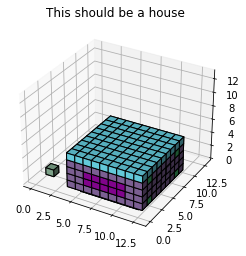

In [157]:
# coloured hosue test
house1 = selected_sample_houses[0]
print(house1.shape)
# house1 = house1[5:11, 1:7, 1:7, :] # stript down the house

voxelarray = house1[:,:,:,0]
print(np.unique(voxelarray))

color_dict = get_color_dict(np.unique(voxelarray))

colors = convert_to_color(voxelarray, color_dict)

fig = plt.figure()
ax = fig.add_subplot(projection='3d', adjustable='box')
ax.title.set_text('This should be a house')
ax.voxels(voxelarray, facecolors=colors, edgecolor="k")

plt.show()

In [188]:
def visualise_world(world):

    (x, y, z, m) = world.shape
    
    blockidarray = world[:,:,:,0]
    print(blockidarray.shape)
    print(np.unique(blockidarray))
    
    blockmetaarray = world[:,:,:,1]
    print(blockmetaarray.shape)
    print(np.unique(blockmetaarray))

    color_dict = get_color_dict(np.unique(blockidarray))

    colors = convert_to_color(blockidarray, color_dict)
    
    meta_color_dict = get_color_dict(np.unique(blockmetaarray))

    edge_colors = convert_to_color(blockmetaarray, meta_color_dict)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d', adjustable='box')
    ax.title.set_text('This should be a house')
    ax.voxels(blockidarray, facecolors=colors, edgecolors=edge_colors)

    plt.show()

(18, 18, 18)
[  0   5  17  20  44  50  98 109 179 194]
(18, 18, 18)
[ 0  1  2  3  4  5  6  7  8  9 13]


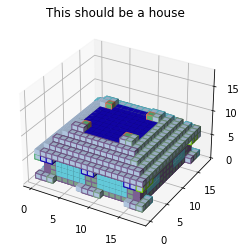

In [189]:
visualise_world(sample_houses[1])

(13, 13, 13)
[  0   2   4   5  26  50  54  58  61  64  84  89 102 145]
(13, 13, 13)
[ 0  2  3  4  8 11]


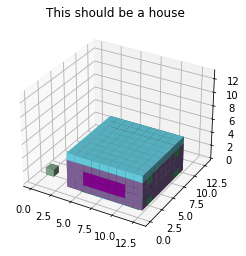

(21, 21, 21)
[  0   5   8  45  50  64  85 102 106 125 126]
(21, 21, 21)
[0 1 2 3 4 5 8 9]


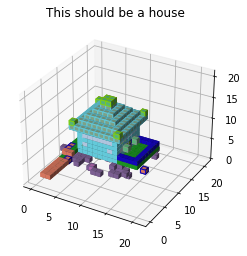

(18, 18, 18)
[  0   2  26  43  44  50  68  72  85 102 116 130 155 156 184 251]
(18, 18, 18)
[ 0  1  2  3  4  5  7  8 10 15]


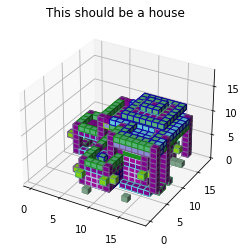

(23, 23, 23)
[  0   8  17  18  20  26  50  65  85 106 185 195]
(23, 23, 23)
[ 0  1  2  3  4  5  8  9 11]


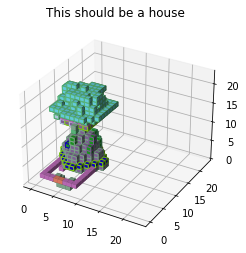

(16, 16, 16)
[  0   2   5  12  17  26  54  58  64  72  85 107 116 126 134 160 169]
(16, 16, 16)
[0 1 2 4 5 6 7 8]


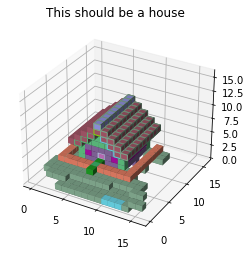

(54, 54, 54)
[0 2]
(54, 54, 54)
[0]


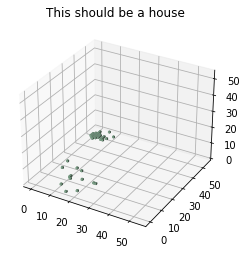

In [190]:
# _ = [visualise_world(world) for world in sample_houses]
_ = [visualise_world(world) for world in selected_sample_houses]

In [136]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]
